1) Importer les librairies classiques : numpy, pandas, sklearn.svm, seaborn et matplolib

In [3]:
import numpy as np
import pandas as pd
#import seaborn
import matplotlib.pyplot as plt

2) Lire le fichier < iris_SVM.csv > avec pandas

In [4]:
df=pd.read_csv('iris_SVM.csv',sep=";",decimal=',')
df

,petal_length,petal_width,species
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0
...,...,...,...
95,4.2,1.2,1
96,4.2,1.3,1
97,4.3,1.3,1
98,3.0,1.1,1


3) Lire les trois premières lignes du fichier. Donner le nombre de lignes et de colonnes 

In [5]:
print(df.shape)
df[:][0:3]


(100, 3)


,petal_length,petal_width,species
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0


4) Créer trois listes(array) petal_length,petal_width et species

In [6]:
petal_length=np.array(df['petal_length'])
petal_width=np.array(df['petal_width'])
species=np.array(df['species'])

5) Tracer sur la même figure les nuages de point de "petal_width" en fonction de "petal_length". Les points seront de couleurs différentes selon leur catégorie respective dans "species" 

Les 2 couleurs suivantes sont à utiliser: vert pour setosa, rouge pour versicolor. Mettre une légande sur le  graphe 

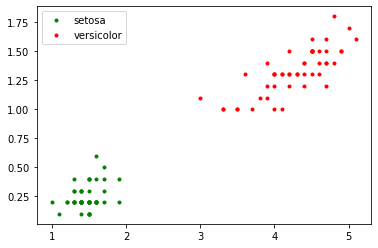

In [7]:
#création de 4 listes pour spéarer sedosa et versicolor pour le tracé
setosa=[]
versicolor=[]
length_s=[]
length_v=[]

for i in range(len(petal_width)):
    #on suppose que 0,1 correspond respectivement au setosa et versicolor 
    if species[i]==0:
        setosa.append(petal_width[i])
        length_s.append(petal_length[i])
    else :
        versicolor.append(petal_width[i])
        length_v.append(petal_length[i])        

plt.plot(length_s,setosa,'g.',label='setosa')
plt.plot(length_v,versicolor,'r.',label='versicolor')
plt.legend()
plt.show()

6) Placer sur la figure précédente un point noir correspondant à un nouveau échantillon de fleur dont la pétale a les dimensions suivantes:
    largeur = 2,5 cm et longueur = 0,75 cm

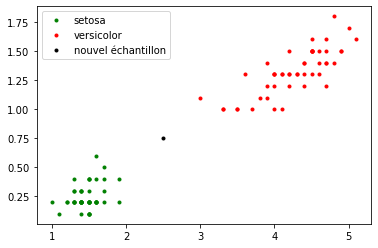

In [8]:
plt.plot(length_s,setosa,'g.',label='setosa')
plt.plot(length_v,versicolor,'r.',label='versicolor')
#introduction nouv
plt.plot([2.5],[0.75],'k.',label='nouvel échantillon')
plt.legend()
plt.show()

7) Séparer les données en X_train, X_test, Y_train, Y_test (80% pour entrainement)

In [14]:
from sklearn.model_selection import train_test_split
#Séparation des données en 4 listes avec des données test de 20%
X_train, X_test, Y_train, Y_test = train_test_split(df[['petal_length','petal_width']],df['species'],test_size=0.2)
X_train.values.reshape(-1,1)

array([[1.5],
       [0.2],
       [4.5],
       [1.5],
       [4.2],
       [1.5],
       [1.4],
       [0.2],
       [1.6],
       [0.6],
       [4. ],
       [1.3],
       [3.5],
       [1. ],
       [1.5],
       [0.2],
       [4.6],
       [1.5],
       [4.7],
       [1.6],
       [1.5],
       [0.1],
       [1.5],
       [0.2],
       [3.3],
       [1. ],
       [1.3],
       [0.2],
       [1.6],
       [0.4],
       [1.5],
       [0.4],
       [1.5],
       [0.4],
       [1. ],
       [0.2],
       [4. ],
       [1.3],
       [4.5],
       [1.5],
       [4.3],
       [1.3],
       [1.9],
       [0.2],
       [4.5],
       [1.5],
       [4.2],
       [1.3],
       [1.4],
       [0.2],
       [4. ],
       [1.3],
       [1.7],
       [0.5],
       [1.7],
       [0.3],
       [1.5],
       [0.4],
       [3.5],
       [1. ],
       [4.4],
       [1.3],
       [4. ],
       [1. ],
       [4.3],
       [1.3],
       [4.5],
       [1.3],
       [4.8],
       [1.8],
       [1.5],
      

8) Entrainement, test en utilisant l'algorithme SVM (SVC= pour classification,  SVR : pour regression)

In [10]:
from sklearn.svm import SVC


model_svc=SVC(kernel='linear',shrinking=False)
model_svc.fit(X_train,Y_train)

#y_t=np.reshape(Y_test,(-1,1))
Y_predict=model_svc.predict(X_test)

Y_predict

array([0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0])

9) Vérifier le score "from sklearn.metrics import accuracy_score"

In [11]:
from sklearn.metrics import accuracy_score

print(model_svc.score(X_test,Y_test))

1.0


10) Tracer le plan (droite) de séparation entre les classes

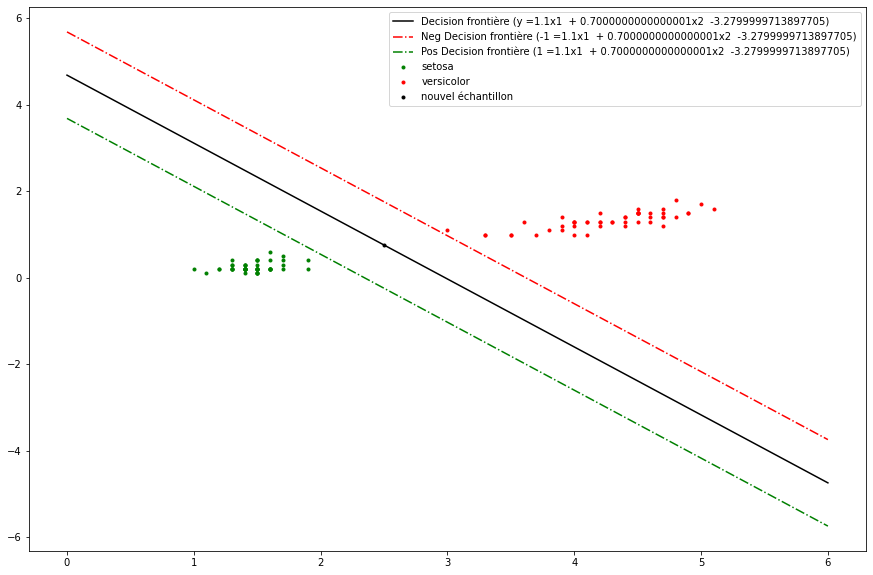

In [12]:
 
w = model_svc.coef_[0]
a = -w[0] / w[1]
 
xx = np.linspace(0,6)
yy = a * xx - model_svc.intercept_[0] / w[1]
y_neg = a * xx - model_svc.intercept_[0] / w[1] + 1
y_pos = a * xx - model_svc.intercept_[0] / w[1] - 1

plt.figure(1,figsize= (15, 10))

plt.plot(xx, yy, 'k',
         label=f"Decision frontière (y ={w[0]}x1  + {w[1]}x2  {model_svc.intercept_[0] })")
plt.plot(xx, y_neg, 'r-.',
         label=f"Neg Decision frontière (-1 ={w[0]}x1  + {w[1]}x2  {model_svc.intercept_[0] })")
plt.plot(xx, y_pos, 'g-.',
         label=f"Pos Decision frontière (1 ={w[0]}x1  + {w[1]}x2  {model_svc.intercept_[0] })")
 
plt.plot(length_s,setosa,'g.',label='setosa')
plt.plot(length_v,versicolor,'r.',label='versicolor')
#introduction nouv
plt.plot([2.5],[0.75],'k.',label='nouvel échantillon')
plt.legend()
plt.show()